<a href="https://colab.research.google.com/github/Zahidd02/Covid_19_Tracker_App/blob/main/TensorFlow/Project_Fashion_MNIST_using_Deep_Neural_Network_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import math
import numpy as np
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
dataset, metadata = tfds.load('fashion_mnist',
                              as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
dataset_columns = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

* We have used 'softmax' for classification of outputs to different results.
* Commented the previous simple model structure and switched to CNN.





In [5]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [8]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(60000/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 24s 8ms/step - loss: 0.3884 - accuracy: 0.8615
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2522 - accuracy: 0.9081
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2075 - accuracy: 0.9247
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1758 - accuracy: 0.9352
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1525 - accuracy: 0.9440
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1277 - accuracy: 0.9538
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1052 - accuracy: 0.9612
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0875 - accuracy: 0.9684
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0752 - accuracy: 0.9719
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - lo

In [9]:
test_images = []
test_labels = []
prediction = []
for images, labels in test_dataset.take(3):
  test_images.append(images.numpy())
  test_labels.append(labels.numpy())
  prediction.append(model.predict(images))

1/1 [==============================] - 0s 15ms/step


In [10]:
def plot_image(i, test_images, predicted, actual):
  fig, ax = plt.subplots()
  plt.imshow(test_images[i].reshape(28,28), cmap=plt.cm.binary)
  probability = np.max(predicted) * 100 
  predicted = np.argmax(predicted)
  if(predicted == actual):
    color = 'green'
  else:
    color = 'red'
  ax.set_title('Predicted Clothing: ' + str(dataset_columns[predicted]) +
            ' | Actual Clothing: '+ str(dataset_columns[actual]) + '\n'
            , color = color)
  ax.set_xlabel("Probability of being correct = {:.2f}".format(probability))
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  ax.set_xticks([])
  ax.set_yticks([])
  print("\n")

* i = Random index value
* considered_set = Set you want to test from, will be always less than n in '.take(n)' in previous steps..




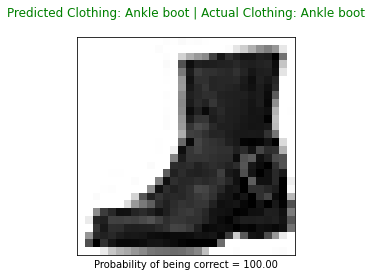

In [11]:
i = 0
considered_set = 1
testing_images = test_images[considered_set]
testing_labels = test_labels[considered_set]
testing_predictions = prediction[considered_set]
plot_image(i, testing_images, testing_predictions[i], testing_labels[i])

**Evaluating Accuracy of the model**

In [12]:
test_loss, test_accuracy = model.evaluate(test_dataset, 
                                          steps=math.ceil(60000/BATCH_SIZE))
print("Accuracy on test dataset: ", test_accuracy)

1875/1875 [==============================] - 2s 958us/step - loss: 0.3031 - accuracy: 0.9238
Accuracy on test dataset:  0.923799991607666
